In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Daily transaction.csv')
df=df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.sort_index()
df.head()

,Daily_unique_customers,daily_revenue,ARPU
Date,,,
2015-01-01,12,570,47.500000
2015-02-01,17,954,56.117647
2015-03-01,24,1503,62.625000
2015-04-01,23,1215,52.826087
2015-05-01,33,1656,50.181818


In [3]:
df.tail()

,Daily_unique_customers,daily_revenue,ARPU
Date,,,
2019-12-27,492,36462,74.109756
2019-12-28,512,31259,61.052734
2019-12-29,315,19494,61.885714
2019-12-30,358,21310,59.525140
2019-12-31,240,13349,55.620833


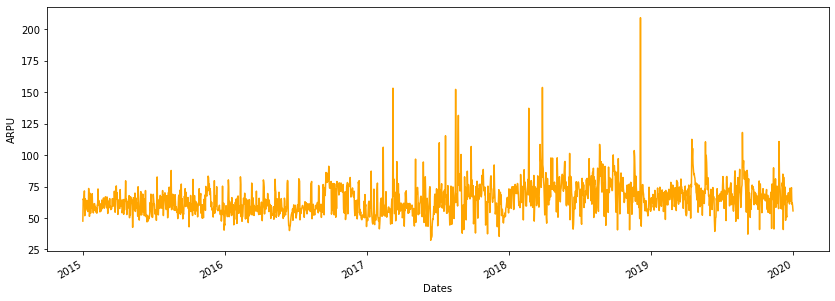

In [4]:
plt.figure(figsize=(14,5))
df.ARPU.plot(color='orange')
plt.ylabel('ARPU')
plt.xlabel('Dates')
plt.show()

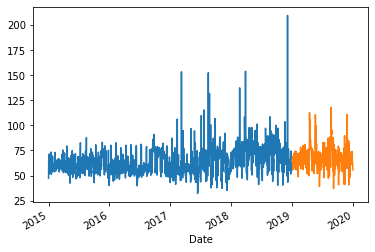

c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be

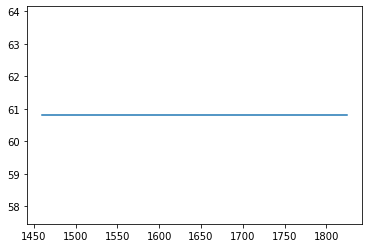

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing

train = df.loc[df.index < pd.to_datetime('31-12-2018')].ARPU
test = df.loc[df.index >= pd.to_datetime('01-01-2019')].ARPU
train.plot()
test.plot()
plt.show()

ses = SimpleExpSmoothing(train).fit()
print(ses)
fcast1 = ses.forecast(365)
fcast1
fcast1.plot()

c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >=

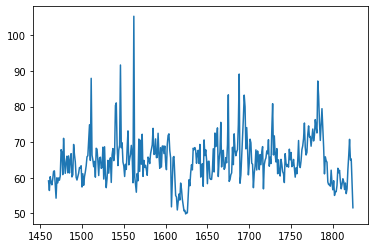

In [6]:
from statsmodels.tsa.api import ExponentialSmoothing as HWES

hwes = HWES(train, trend = 'add', damped = True, seasonal = 'add', seasonal_periods = 365).fit(smoothing_level = 0.1)
fcast2 = hwes.forecast(365)
fcast2
fcast2.plot()

In [7]:
fcast1.index = test.index
fcast2.index = test.index

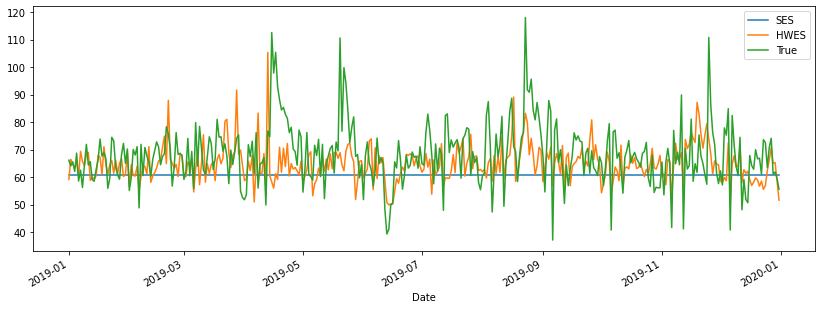

In [8]:
plt.figure(figsize = (14,5))

fcast1.plot(label='SES')
fcast2.plot(label='HWES')
test.plot(label='True')
plt.legend()
plt.show()

In [9]:
def mae_metric(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)))

def smape_metric(y_true, y_pred):
    return 200* np.mean(np.abs(y_true - y_pred)/(y_true + y_pred))

def mape_metric(y_true, y_pred):
    return 100* np.mean(np.abs(y_true - y_pred)/y_true)

In [10]:
mape_metric(test.values,fcast1)

13.904396398391668

In [11]:
mape_metric(test.values,fcast2)

12.063863839528983

c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\bidisha\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >=

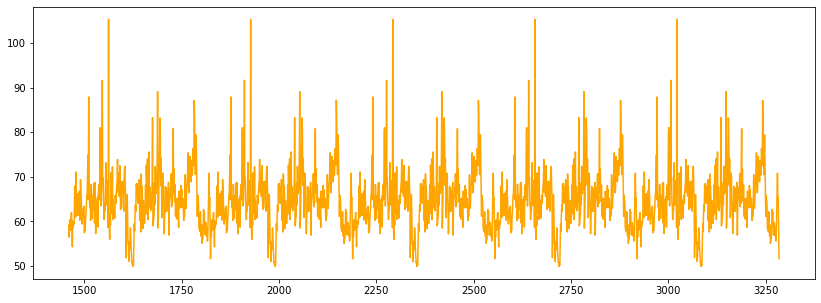

In [12]:
from statsmodels.tsa.api import ExponentialSmoothing as HWES
plt.figure(figsize = (14,5))

hwes = HWES(train, trend = 'add', damped = True, seasonal = 'add', seasonal_periods = 365).fit(smoothing_level = 0.1)
fcast2 = hwes.forecast(365*5)
fcast2
fcast2.plot(color='orange')
plt.savefig("figure.png")

In [13]:
fcast2.to_csv('fcast2.csv')

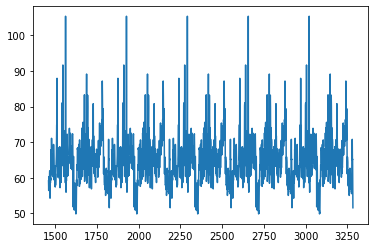

In [14]:
fcast2.plot()

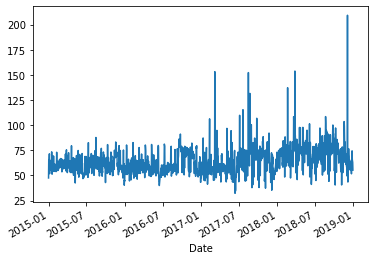

In [15]:
train.plot()

In [16]:
for i in range(int(fcast2.shape[0]/365)): # i => 0,1,2,3,4
    vals = fcast2[365*i:365*(i+1)]
    print(vals.mean())

64.87221771811994
64.87225226891016
64.87225226891016
64.87225226891016
64.87225226891016


In [17]:
gr=((64.87225226891016-64.87221771811994)/5)*100
gr

0.0006910158043638148